# 3 CER Forest Structure Analysis Post Defense  

### Notebook contents 
* Copied from notebook 7 to start after the defense.
* Start addressing forest structure with BAF and DCE...
* Using the netcdf v3 from notebook 1 in this folder

created by Cassie Lumbrazo\
date: Feb 2024\
python environment: **raster**

In [2]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [3]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [4]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3.nc') 
ds

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                         (band: 1, y: 1388, x: 2564)
Coordinates:
  * x                               (x) float64 4.65e+05 4.65e+05 ... 4.676e+05
  * y                               (y) float64 2.111e+05 ... 2.097e+05
  * band                            (band) int32 1
    spatial_ref                     int32 ...
Data variables: (12/139)
    hs_rapid_set1                   (band, y, x) float32 ...
    hs_rapid_set2                   (band, y, x) float32 ...
    hs_rapid_set3                   (band, y, x) float32 ...
    hs_rapid_set2_maskpiles         (band, y, x) float32 ...
    hs_rapid_set3_maskpiles         (band, y, x) float32 ...
    chmws_rapid                     (band, y, x) float32 ...
    ...                              ...
    giulia_dce_ncalm_baf_new_140    (band, y, x) float32 ...
    baf_new_grouped                 (band, y, x) float32 ...
    dce_rapid_baf_new_30            (band, y, x) float32 ...
    dce_ncalm_baf_new_30            (band, y, x) float32 ...
    giulia_dce_rapid_baf_new_30     (band, y, x) float64 ...
    giulia_dce_ncalm_baf_new_30     (band, y, x) float32 ...

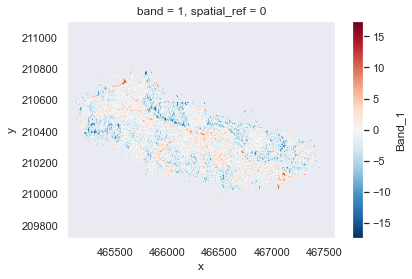

In [5]:
ds['dce_ncalm'].plot()

In [6]:
# for the entire dataset, make all else nan where ds.dce_rapid is nan 
# ds = ds.where(ds.dce_rapid != -9999)
ds = ds.where(ds.dce_rapid.notnull()) # making the entire dataset null where there is no data here 

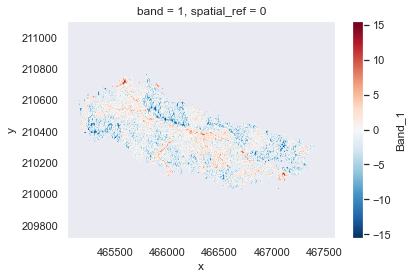

In [7]:
ds['dce_ncalm'].plot()

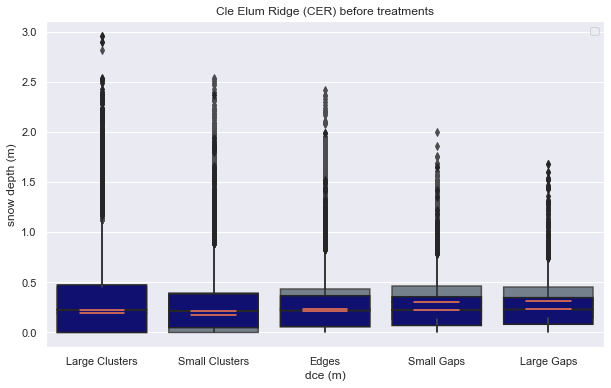

In [8]:
plt.figure(figsize=(10,6))

sns.boxplot(x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            notch=True, showcaps=False, medianprops={"color":"coral"}, color='slategrey')
sns.boxplot(x=ds['giulia_dce_ncalm_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            notch=True, showcaps=False, medianprops={"color":"coral"}, color='navy')
plt.xlabel('dce (m)')
plt.ylabel('snow depth (m)')
plt.title('Cle Elum Ridge (CER) before treatments')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
plt.legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

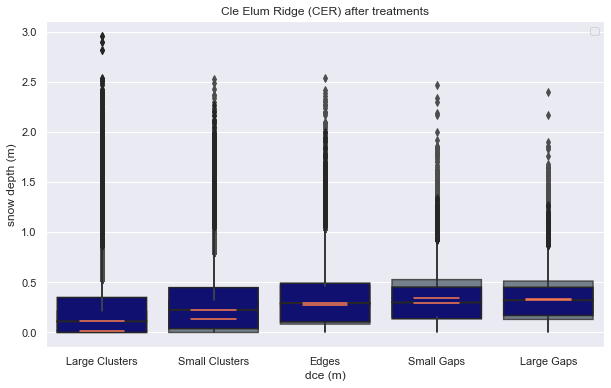

In [9]:
plt.figure(figsize=(10,6))

sns.boxplot(x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            notch=True, showcaps=False, medianprops={"color":"coral"}, color='slategrey')
sns.boxplot(x=ds['giulia_dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            notch=True, showcaps=False, medianprops={"color":"coral"}, color='navy')
plt.xlabel('dce (m)')
plt.ylabel('snow depth (m)')
plt.title('Cle Elum Ridge (CER) after treatments')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
plt.legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

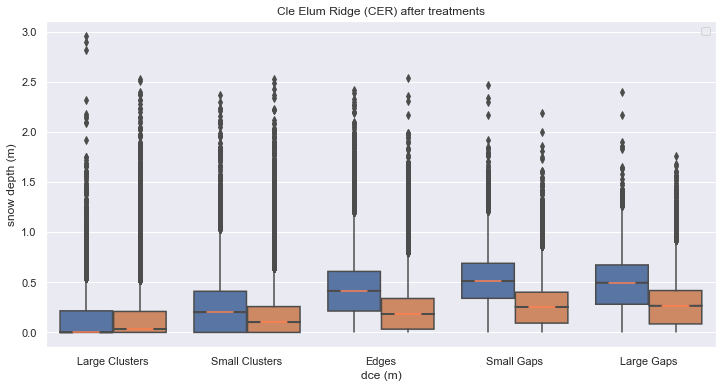

In [10]:
plt.figure(figsize=(12,6))

sns.boxplot(x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel('dce (m)')
plt.ylabel('snow depth (m)')
plt.title('Cle Elum Ridge (CER) after treatments')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
plt.legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

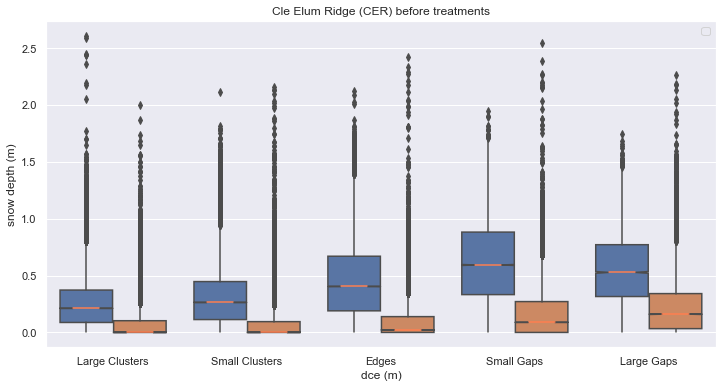

In [11]:
plt.figure(figsize=(12,6))

sns.boxplot(x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel('dce (m)')
plt.ylabel('snow depth (m)')
plt.title('Cle Elum Ridge (CER) before treatments')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
plt.legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

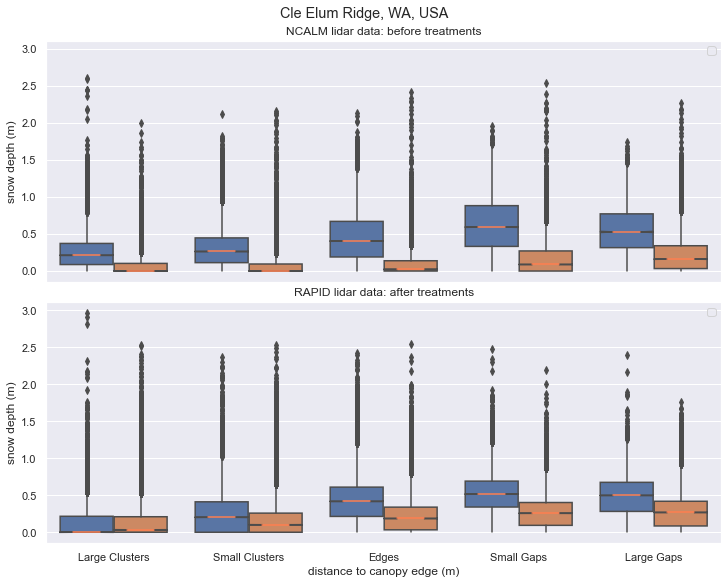

In [67]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.boxplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data: before treatments')
axes[1].set_title('RAPID lidar data: after treatments')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

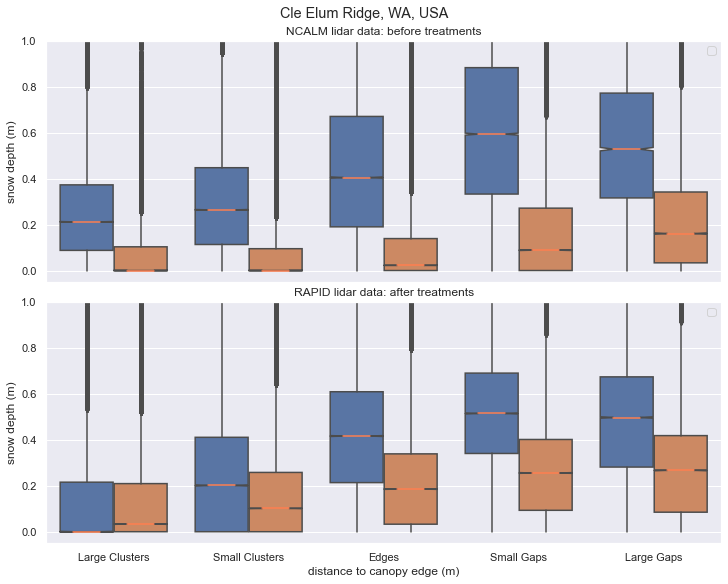

In [70]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.boxplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data: before treatments')
axes[1].set_title('RAPID lidar data: after treatments')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

# y limit 
axes[0].set_ylim(-0.05, 1)
axes[1].set_ylim(-0.05, 1)

plt.show()

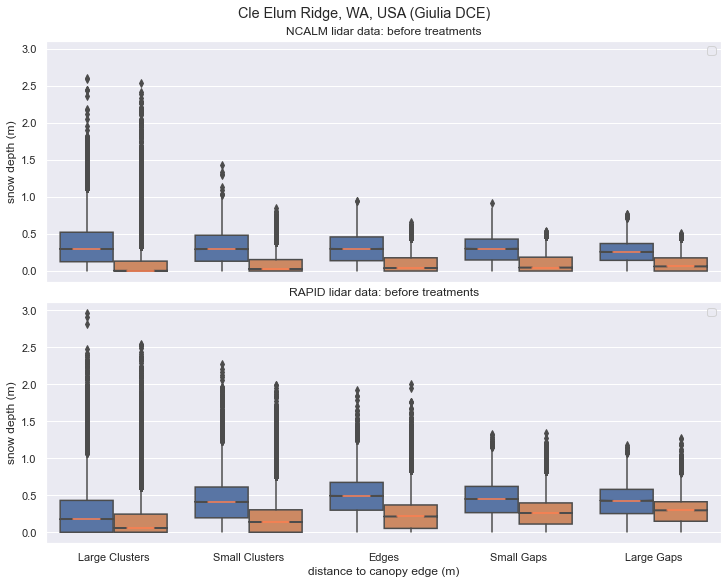

In [13]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA (Giulia DCE)')

sns.boxplot(ax=axes[0], x=ds['giulia_dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['giulia_dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data: before treatments')
axes[1].set_title('RAPID lidar data: before treatments')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

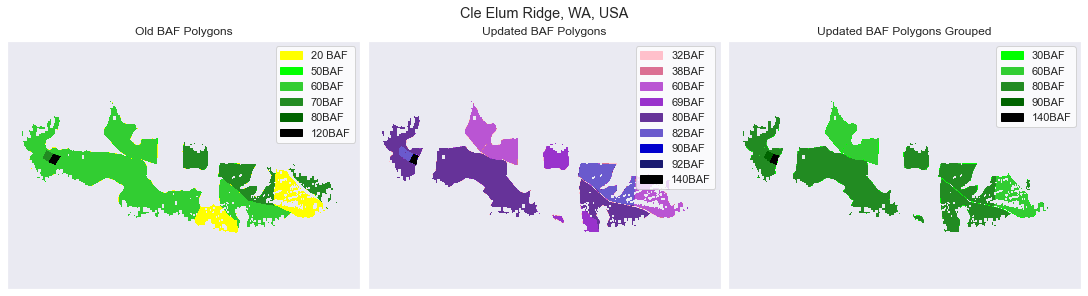

In [14]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')


ds.baf_old.plot(ax=axes[0], cmap=ListedColormap(['yellow', 'lime', 'limegreen', 'forestgreen','darkgreen','black']), add_colorbar=False)
ds.baf_new.plot(ax=axes[1], cmap=ListedColormap(['pink', 'palevioletred', 'mediumorchid','darkorchid','rebeccapurple', 
                                                 'slateblue', 'mediumblue', 'midnightblue', 'black' ]), add_colorbar=False)
ds.baf_new_grouped.plot(ax=axes[2], cmap=ListedColormap(['lime', 'limegreen', 'forestgreen','darkgreen','black']), add_colorbar=False)


# Add a legend for labels for baf
legend_labels = {"yellow": "20 BAF", 
                 "lime": "50BAF",
                 "limegreen": "60BAF",
                 "forestgreen": "70BAF",
                 "darkgreen": "80BAF",
                 "black": "120BAF"}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]

axes[0].legend(handles=patches,
          bbox_to_anchor=(1, 1),
          facecolor="white")

# Add a legend for labels for baf
legend_labels = {"pink": "32BAF",
                 "palevioletred": "38BAF",
                 "mediumorchid": "60BAF",
                 "darkorchid": "69BAF",
                 "rebeccapurple": "80BAF",
                 "slateblue": "82BAF",
                 "mediumblue": "90BAF",
                 "midnightblue": "92BAF",
                 "black": "140BAF",}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]

axes[1].legend(handles=patches,
          bbox_to_anchor=(1, 1),
          facecolor="white")

# Add a legend for labels for baf
legend_labels = {"lime": "30BAF",
                 "limegreen": "60BAF",
                 "forestgreen": "80BAF",
                 "darkgreen": "90BAF",
                 "black": "140BAF"}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]

axes[2].legend(handles=patches,
          bbox_to_anchor=(1, 1),
          facecolor="white")

# labels
axes[0].set_title('Old BAF Polygons')
axes[1].set_title('Updated BAF Polygons')
axes[2].set_title('Updated BAF Polygons Grouped')

axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

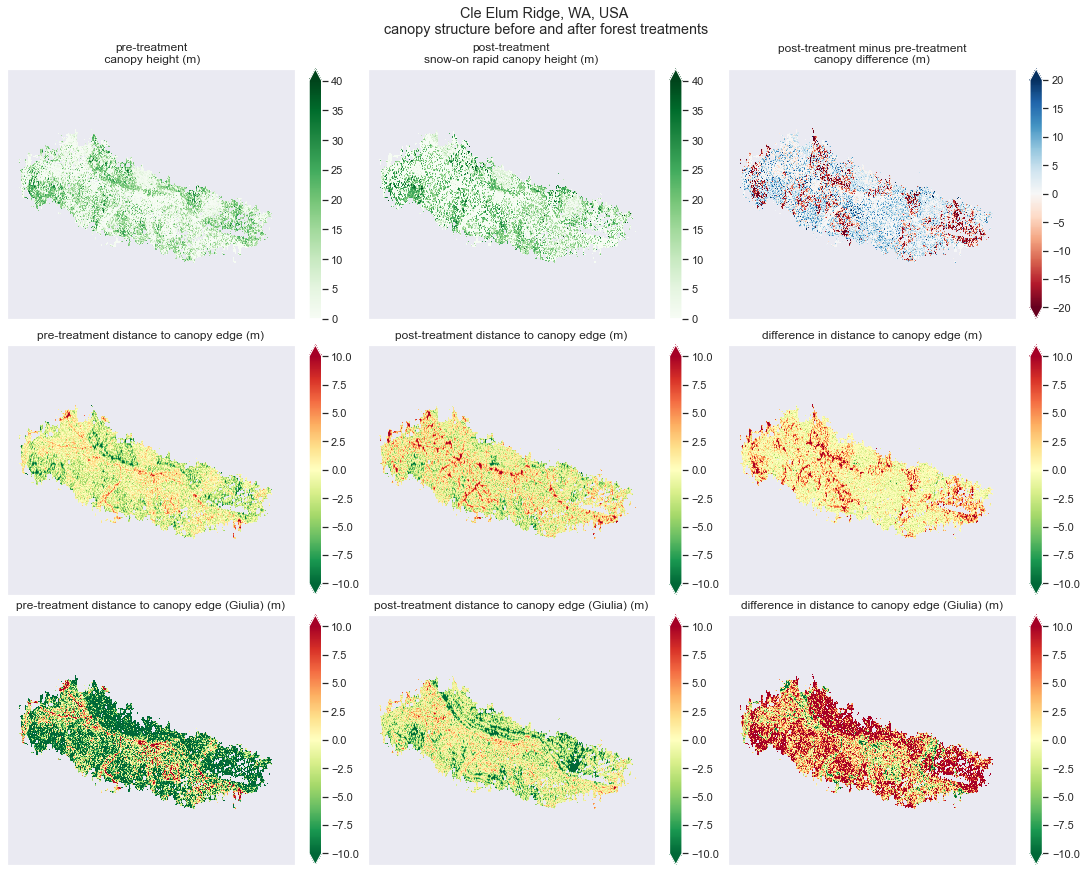

In [15]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,12), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n canopy structure before and after forest treatments')

# row 1
# ds.chm_snowoff.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
# ds.diff_chm_rapid_snowoff.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 

axes[0,0].set_title('pre-treatment\n canopy height (m)')
axes[0,1].set_title('post-treatment\nsnow-on rapid canopy height (m)')
axes[0,2].set_title('post-treatment minus pre-treatment\ncanopy difference (m)')

# row 2
ds.dce_ncalm.plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1,1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[1,2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[1,0].set_title('pre-treatment distance to canopy edge (m)')
axes[1,1].set_title('post-treatment distance to canopy edge (m)')
axes[1,2].set_title('difference in distance to canopy edge (m)')

# row 3 
ds.giulia_dce_ncalm.plot(ax=axes[2,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.giulia_dce_rapid.plot(ax=axes[2,1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_giulia_dce_rapid_ncalm.plot(ax=axes[2,2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[2,0].set_title('pre-treatment distance to canopy edge (Giulia) (m)')
axes[2,1].set_title('post-treatment distance to canopy edge (Giulia) (m)')
axes[2,2].set_title('difference in distance to canopy edge (Giulia) (m)')


# some constants 
# row 1 
axes[0,0].set_xlabel(''); axes[0,0].set_ylabel(''); axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel(''); axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[0,2].set_xlabel(''); axes[0,2].set_ylabel(''); axes[0,2].set_xticks([]); axes[0,2].set_yticks([])

# row 2
axes[1,0].set_xlabel(''); axes[1,0].set_ylabel(''); axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel(''); axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[1,2].set_xlabel(''); axes[1,2].set_ylabel(''); axes[1,2].set_xticks([]); axes[1,2].set_yticks([])

# row 3 
axes[2,0].set_xlabel(''); axes[2,0].set_ylabel(''); axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
axes[2,1].set_xlabel(''); axes[2,1].set_ylabel(''); axes[2,1].set_xticks([]); axes[2,1].set_yticks([])
axes[2,2].set_xlabel(''); axes[2,2].set_ylabel(''); axes[2,2].set_xticks([]); axes[2,2].set_yticks([])
plt.show()

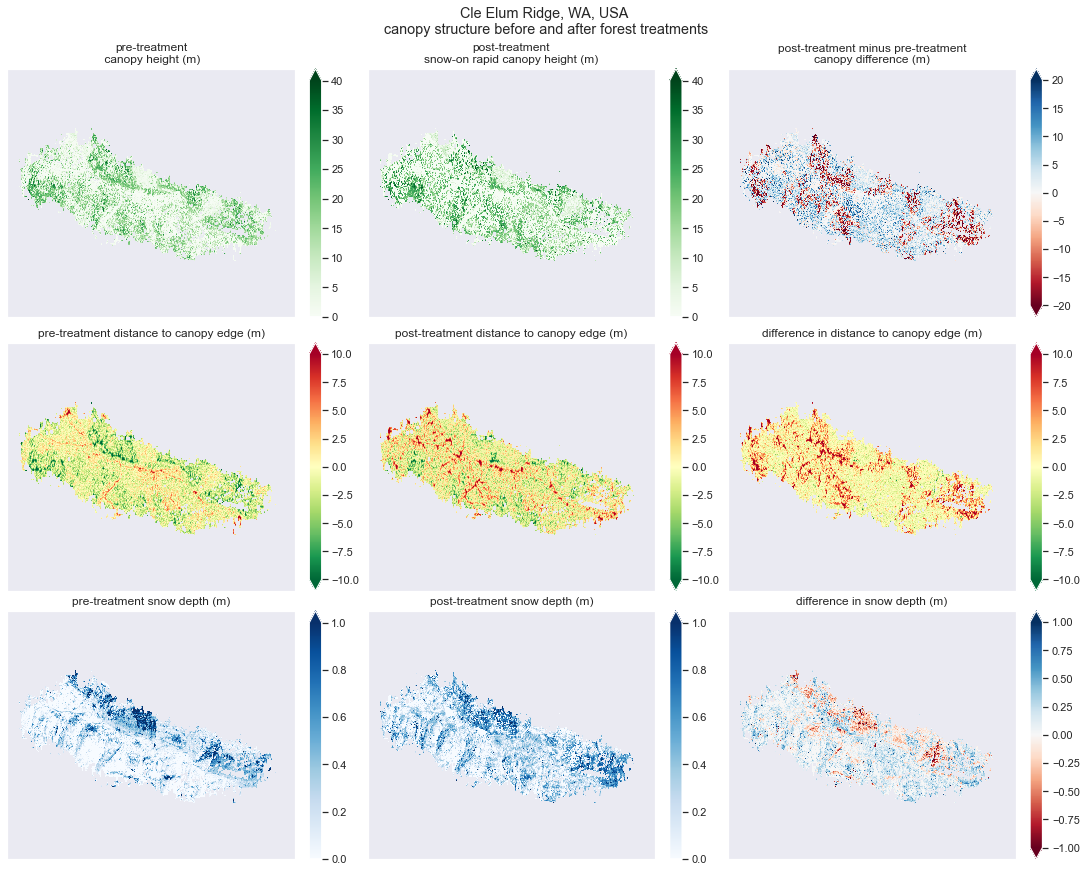

In [16]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,12), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n canopy structure before and after forest treatments')

# row 1
# ds.chm_snowoff.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
# ds.diff_chm_rapid_snowoff.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 

axes[0,0].set_title('pre-treatment\n canopy height (m)')
axes[0,1].set_title('post-treatment\nsnow-on rapid canopy height (m)')
axes[0,2].set_title('post-treatment minus pre-treatment\ncanopy difference (m)')

# row 2
ds.dce_ncalm.plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1,1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[1,2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[1,0].set_title('pre-treatment distance to canopy edge (m)')
axes[1,1].set_title('post-treatment distance to canopy edge (m)')
axes[1,2].set_title('difference in distance to canopy edge (m)')

# row 3 
ds.hs_ncalm.plot(ax=axes[2,0], cmap='Blues', vmin=0, vmax=1, cbar_kwargs={'label':''})
ds.hs_rapid.plot(ax=axes[2,1], cmap='Blues', vmin=0, vmax=1, cbar_kwargs={'label':''})
ds.diff_hs_rapid_ncalm.plot(ax=axes[2,2], cmap='RdBu', vmin=-1, vmax=1, cbar_kwargs={'label':''})

axes[2,0].set_title('pre-treatment snow depth (m)')
axes[2,1].set_title('post-treatment snow depth (m)')
axes[2,2].set_title('difference in snow depth (m)')


# some constants 
# row 1 
axes[0,0].set_xlabel(''); axes[0,0].set_ylabel(''); axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel(''); axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[0,2].set_xlabel(''); axes[0,2].set_ylabel(''); axes[0,2].set_xticks([]); axes[0,2].set_yticks([])

# row 2
axes[1,0].set_xlabel(''); axes[1,0].set_ylabel(''); axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel(''); axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[1,2].set_xlabel(''); axes[1,2].set_ylabel(''); axes[1,2].set_xticks([]); axes[1,2].set_yticks([])

# row 3 
axes[2,0].set_xlabel(''); axes[2,0].set_ylabel(''); axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
axes[2,1].set_xlabel(''); axes[2,1].set_ylabel(''); axes[2,1].set_xticks([]); axes[2,1].set_yticks([])
axes[2,2].set_xlabel(''); axes[2,2].set_ylabel(''); axes[2,2].set_xticks([]); axes[2,2].set_yticks([])
plt.show()

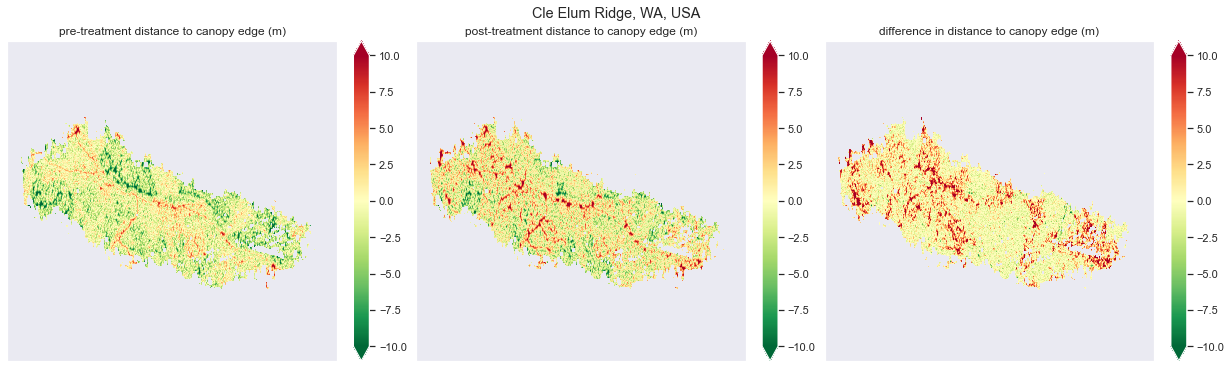

In [17]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17,5), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

ds.dce_ncalm.plot(ax=axes[0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[0].set_title('pre-treatment distance to canopy edge (m)')
axes[1].set_title('post-treatment distance to canopy edge (m)')
axes[2].set_title('difference in distance to canopy edge (m)')


axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

Make the same figure, but with the reclass groups

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\3730546199.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[1])
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\3730546199.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[0])


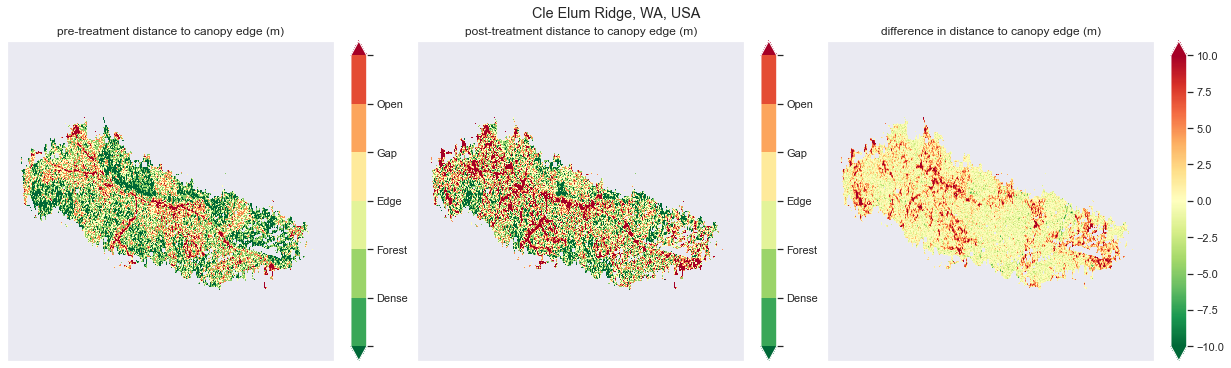

In [66]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17,5), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

#ds.dce_ncalm.plot(ax=axes[0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
#ds.dce_rapid.plot(ax=axes[1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

# discrete colormap for classifications -------------------------------
cmap = mpl.cm.RdYlGn_r
norm = mpl.colors.BoundaryNorm([0, 100,200,300,400,500, 600], cmap.N, extend='both')

ds.dce_rapid_reclass.plot(ax=axes[1], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[1])
# cbar.ax.set_yticklabels(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', '']) # 100 is forest, 300 is edge, 500 is gap
cbar.ax.set_yticklabels(['', 'Dense', 'Forest', 'Edge', 'Gap', 'Open', '']) # 100 is forest, 300 is edge, 500 is gap

ds.dce_ncalm_reclass.plot(ax=axes[0], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[0])
cbar.ax.set_yticklabels(['', 'Dense', 'Forest', 'Edge', 'Gap', 'Open', '']) # 100 is forest, 300 is edge, 500 is gap

# done -----------------------------------------------------------------

axes[0].set_title('pre-treatment distance to canopy edge (m)')
axes[1].set_title('post-treatment distance to canopy edge (m)')
axes[2].set_title('difference in distance to canopy edge (m)')


axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\4250560436.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[1])
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\4250560436.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[0])


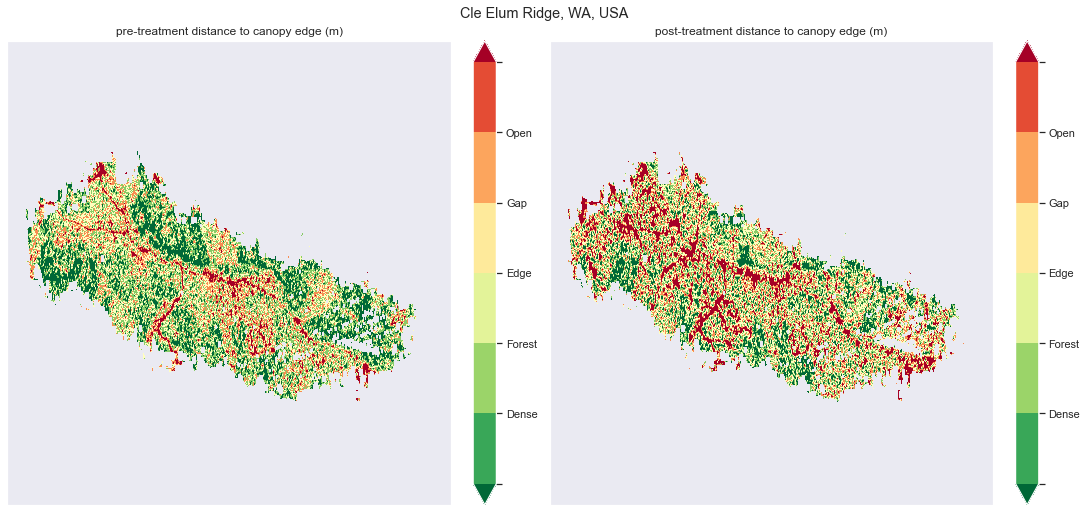

In [65]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,7), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# discrete colormap for classifications -------------------------------
cmap = mpl.cm.RdYlGn_r
norm = mpl.colors.BoundaryNorm([0, 100,200,300,400,500, 600], cmap.N, extend='both')

ds.dce_rapid_reclass.plot(ax=axes[1], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[1])
# cbar.ax.set_yticklabels(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', '']) # 100 is forest, 300 is edge, 500 is gap
cbar.ax.set_yticklabels(['', 'Dense', 'Forest', 'Edge', 'Gap', 'Open', '']) # 100 is forest, 300 is edge, 500 is gap

ds.dce_ncalm_reclass.plot(ax=axes[0], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[0])
cbar.ax.set_yticklabels(['', 'Dense', 'Forest', 'Edge', 'Gap', 'Open', '']) # 100 is forest, 300 is edge, 500 is gap

# done -----------------------------------------------------------------

axes[0].set_title('pre-treatment distance to canopy edge (m)')
axes[1].set_title('post-treatment distance to canopy edge (m)')

axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

# export high resolution image 
plt.savefig('C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\dce_rapid_ncalm_reclass_500.png', dpi=500)

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\3946813921.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[1])
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\3946813921.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[0])


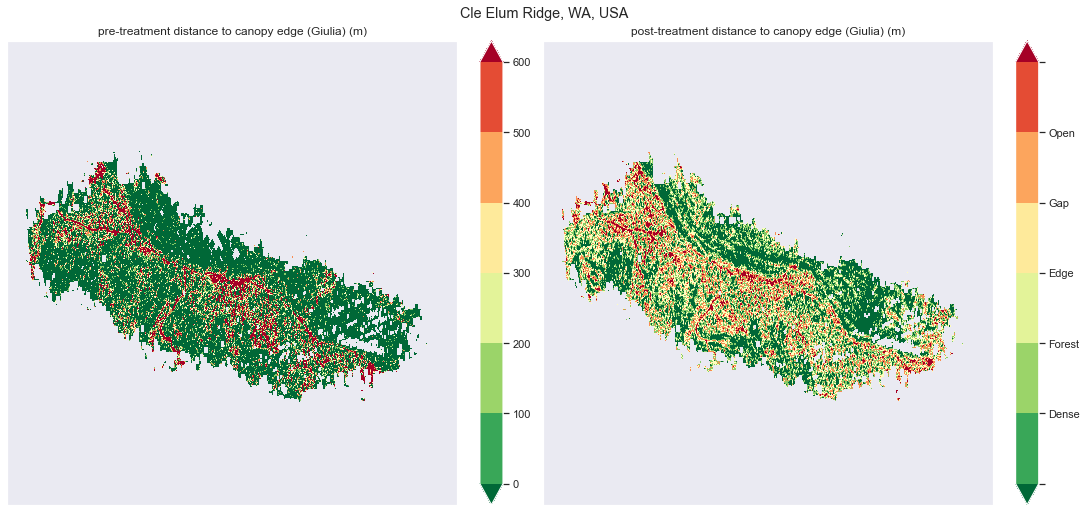

In [20]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,7), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# discrete colormap for classifications -------------------------------
cmap = mpl.cm.RdYlGn_r
norm = mpl.colors.BoundaryNorm([0, 100,200,300,400,500, 600], cmap.N, extend='both')

ds.giulia_dce_rapid_reclass.plot(ax=axes[1], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[1])
# cbar.ax.set_yticklabels(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', '']) # 100 is forest, 300 is edge, 500 is gap
cbar.ax.set_yticklabels(['', 'Dense', 'Forest', 'Edge', 'Gap', 'Open', '']) # 100 is forest, 300 is edge, 500 is gap

ds.giulia_dce_ncalm_reclass.plot(ax=axes[0], cmap=cmap, add_colorbar=False) # this colorbar should be discrete 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r'), ax=axes[0])

# done -----------------------------------------------------------------

axes[0].set_title('pre-treatment distance to canopy edge (Giulia) (m)')
axes[1].set_title('post-treatment distance to canopy edge (Giulia) (m)')

axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

# export high resolution image 
plt.savefig('C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\dce_rapid_ncalm_reclass_500.png', dpi=500)

plt.show()

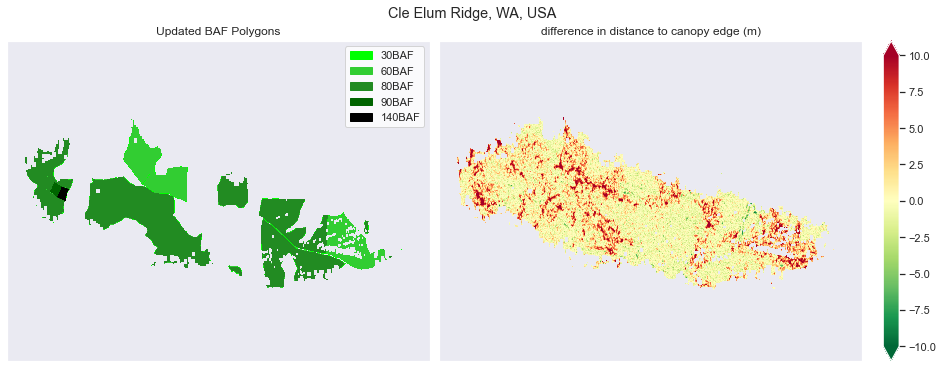

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(13,5), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

ds.baf_new_grouped.plot(ax=axes[0], cmap=ListedColormap(['lime', 'limegreen', 'forestgreen','darkgreen','black']), add_colorbar=False)
# Add a legend for labels for baf
legend_labels = {"lime": "30BAF",
                 "limegreen": "60BAF",
                 "forestgreen": "80BAF",
                 "darkgreen": "90BAF",
                 "black": "140BAF"}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]

axes[0].legend(handles=patches,
          bbox_to_anchor=(1, 1),
          facecolor="white")
ds.diff_dce_rapid_ncalm.plot(ax=axes[1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[0].set_title('Updated BAF Polygons')
axes[1].set_title('difference in distance to canopy edge (m)')

axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

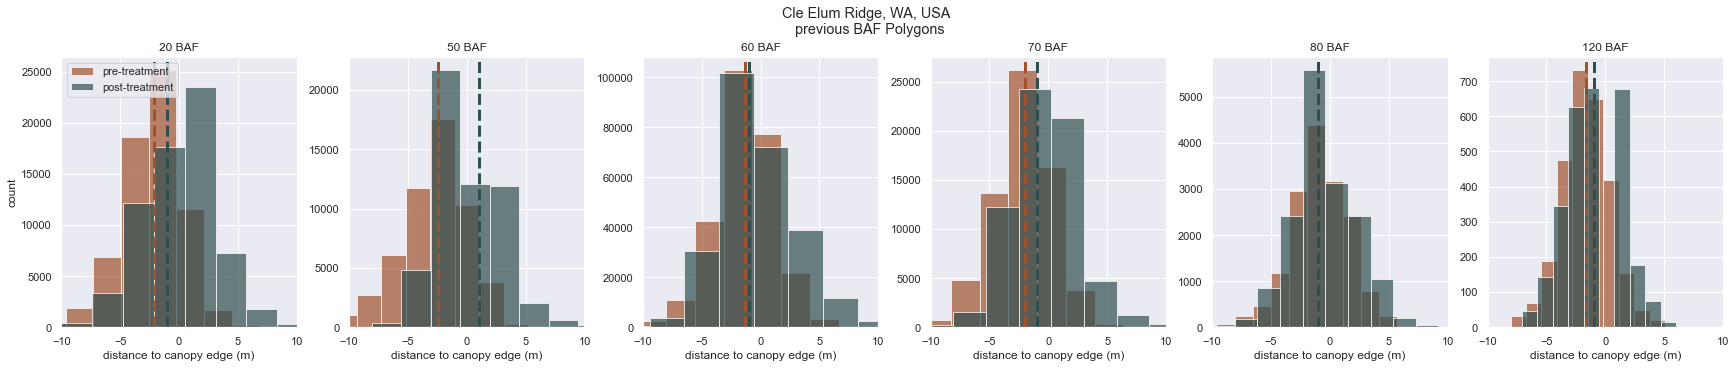

In [23]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 6, sharex=True, sharey=False, figsize=(24,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['dce_ncalm_baf_old_20'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_old_20'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_old_50'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_old_50'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_old_60'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_old_60'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_old_70'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_old_70'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_old_80'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_old_80'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_old_120'].plot.hist(ax=axes[5],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_old_120'].plot.hist(ax=axes[5],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['dce_ncalm_baf_old_20'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['dce_rapid_baf_old_20'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_ncalm_baf_old_50'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid_baf_old_50'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['dce_ncalm_baf_old_60'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['dce_rapid_baf_old_60'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['dce_ncalm_baf_old_70'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['dce_rapid_baf_old_70'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['dce_ncalm_baf_old_80'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['dce_rapid_baf_old_80'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[5].axvline(ds['dce_ncalm_baf_old_120'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[5].axvline(ds['dce_rapid_baf_old_120'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('20 BAF')
axes[1].set_title('50 BAF')
axes[2].set_title('60 BAF')
axes[3].set_title('70 BAF')
axes[4].set_title('80 BAF')
axes[5].set_title('120 BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[5].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n previous BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

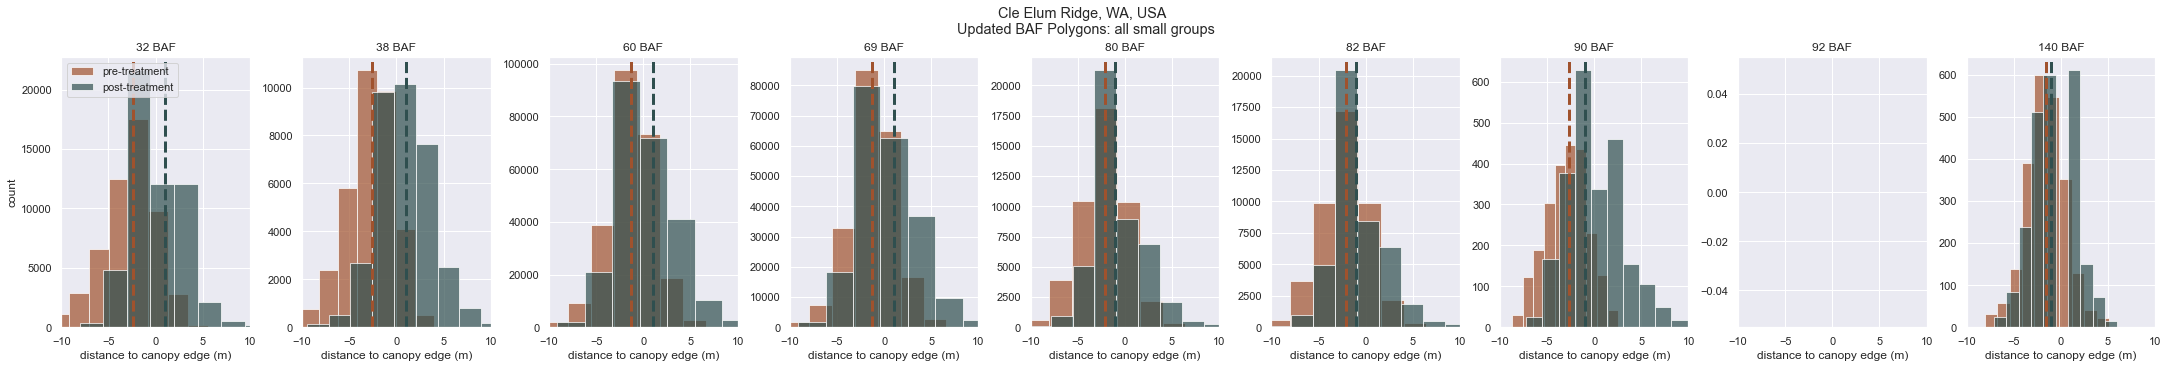

In [24]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 9, sharex=True, sharey=False, figsize=(30,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['dce_ncalm_baf_new_32'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_32'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_38'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_38'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_60'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_69'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_69'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_82'].plot.hist(ax=axes[5],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_82'].plot.hist(ax=axes[5],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].plot.hist(ax=axes[6],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].plot.hist(ax=axes[6],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_92'].plot.hist(ax=axes[7],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_92'].plot.hist(ax=axes[7],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].plot.hist(ax=axes[8],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].plot.hist(ax=axes[8],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['dce_ncalm_baf_new_32'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['dce_rapid_baf_new_32'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_ncalm_baf_new_38'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid_baf_new_38'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['dce_ncalm_baf_new_60'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['dce_rapid_baf_new_60'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['dce_ncalm_baf_new_69'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['dce_rapid_baf_new_69'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['dce_ncalm_baf_new_80'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['dce_rapid_baf_new_80'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[5].axvline(ds['dce_ncalm_baf_new_82'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[5].axvline(ds['dce_rapid_baf_new_82'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[6].axvline(ds['dce_ncalm_baf_new_90'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[6].axvline(ds['dce_rapid_baf_new_90'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[7].axvline(ds['dce_ncalm_baf_new_92'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[7].axvline(ds['dce_rapid_baf_new_92'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[8].axvline(ds['dce_ncalm_baf_new_140'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[8].axvline(ds['dce_rapid_baf_new_140'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('32 BAF')
axes[1].set_title('38 BAF')
axes[2].set_title('60 BAF')
axes[3].set_title('69 BAF')
axes[4].set_title('80 BAF')
axes[5].set_title('82 BAF')
axes[6].set_title('90 BAF')
axes[7].set_title('92 BAF')
axes[8].set_title('140 BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[5].set_xlabel('distance to canopy edge (m)')
axes[6].set_xlabel('distance to canopy edge (m)')
axes[7].set_xlabel('distance to canopy edge (m)')
axes[8].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')
axes[6].set_ylabel('')
axes[7].set_ylabel('')
axes[8].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons: all small groups')
axes[0].legend(loc='upper left')

plt.show()

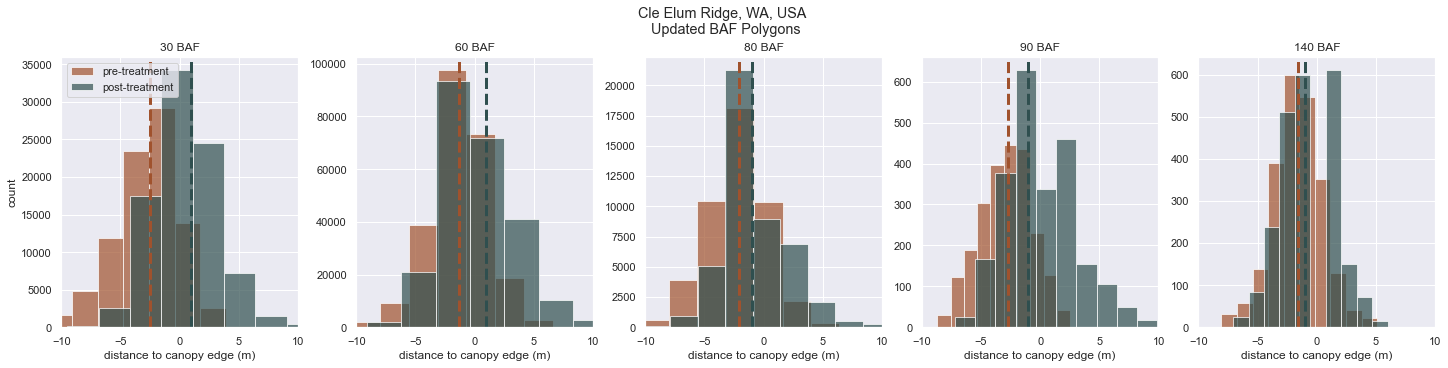

In [25]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['dce_ncalm_baf_new_30'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['dce_ncalm_baf_new_30'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['dce_rapid_baf_new_30'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_ncalm_baf_new_60'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid_baf_new_60'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['dce_ncalm_baf_new_80'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['dce_rapid_baf_new_80'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['dce_ncalm_baf_new_90'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['dce_rapid_baf_new_90'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['dce_ncalm_baf_new_140'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['dce_rapid_baf_new_140'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

Some things we want to do, 
* create box plots.. (see email)
* create histograms with dce groups from Giulia's work
* also, create the histograms with Giulia's DCE
* clean some of this up and start adding things to a presentation

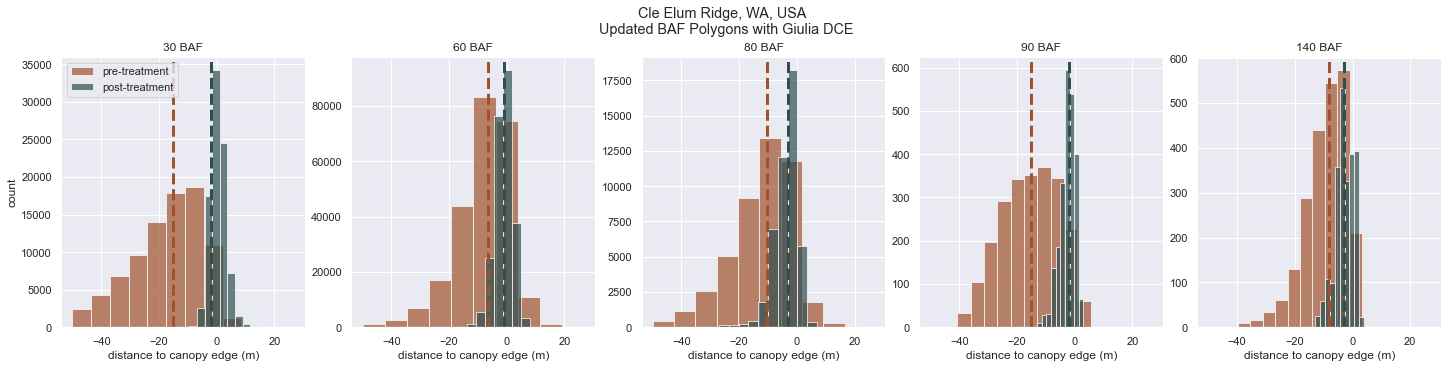

In [26]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['giulia_dce_ncalm_baf_new_30'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['giulia_dce_ncalm_baf_new_60'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_60'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['giulia_dce_ncalm_baf_new_80'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_80'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['giulia_dce_ncalm_baf_new_90'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_90'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['giulia_dce_ncalm_baf_new_140'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_140'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['giulia_dce_ncalm_baf_new_30'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['giulia_dce_rapid_baf_new_30'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['giulia_dce_ncalm_baf_new_60'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['giulia_dce_rapid_baf_new_60'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['giulia_dce_ncalm_baf_new_80'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['giulia_dce_rapid_baf_new_80'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['giulia_dce_ncalm_baf_new_90'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['giulia_dce_rapid_baf_new_90'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['giulia_dce_ncalm_baf_new_140'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['giulia_dce_rapid_baf_new_140'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
#axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons with Giulia DCE')
axes[0].legend(loc='upper left')

plt.show()

Versions of the histograms that are binned by the DCE groups 

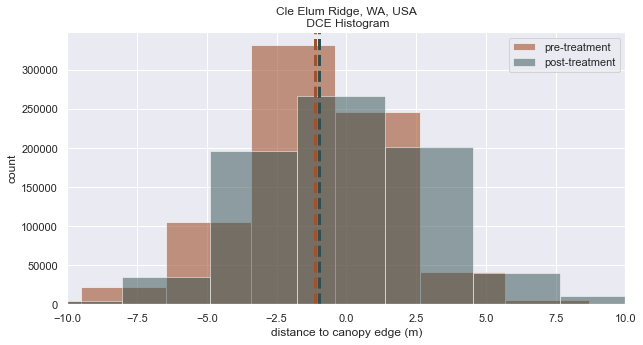

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ds['dce_ncalm'].plot.hist(alpha=0.6, color=colorpre, label='pre-treatment')
ds['dce_rapid'].plot.hist(alpha=0.5, color=colorpos, label='post-treatment')

# plot the medians 
ax.axvline(ds['dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
ax.axvline(ds['dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

plt.xlim(-10,10)

plt.title('Cle Elum Ridge, WA, USA\n DCE Histogram')
plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')
plt.legend()
plt.show()

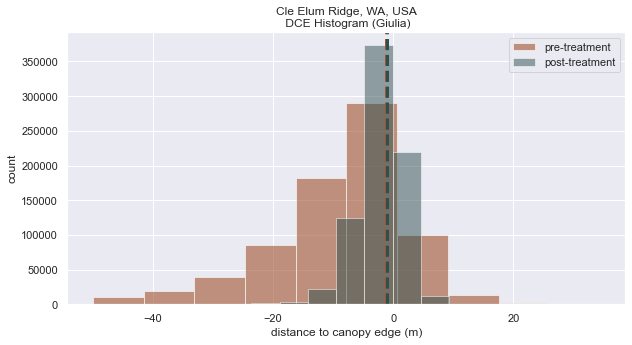

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ds['giulia_dce_ncalm'].plot.hist(alpha=0.6, color=colorpre, label='pre-treatment')
ds['giulia_dce_rapid'].plot.hist(alpha=0.5, color=colorpos, label='post-treatment')

# plot the medians 
ax.axvline(ds['dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
ax.axvline(ds['dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# plt.xlim(-10,10)

plt.title('Cle Elum Ridge, WA, USA\n DCE Histogram (Giulia)')
plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')
plt.legend()
plt.show()

Text(0.5, 0, 'distance to canopy edge (m)')

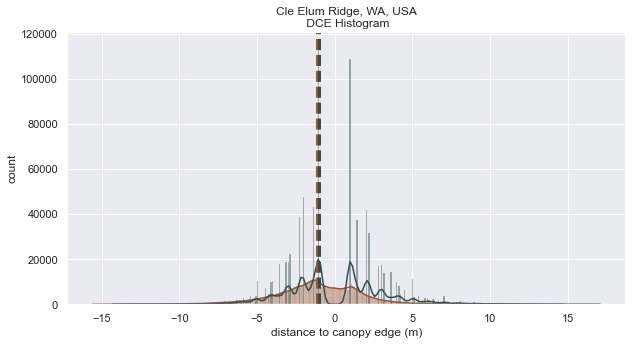

In [73]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ds['dce_ncalm'].values.flatten(), color=colorpre, label='pre-treatment', kde=True)
sns.histplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', kde=True)

# plot the medians
ax.axvline(ds['dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
ax.axvline(ds['dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

plt.title('Cle Elum Ridge, WA, USA\n DCE Histogram')
plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')

Text(0.5, 0, 'distance to canopy edge (m)')

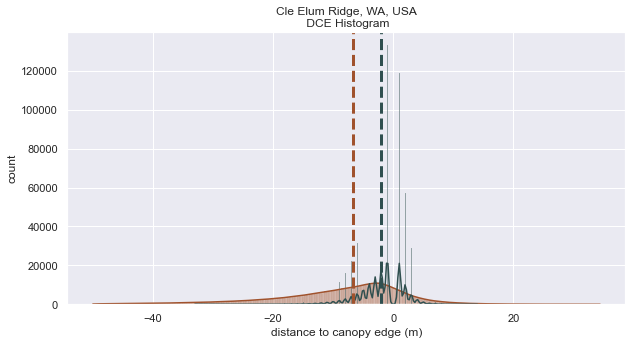

In [74]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ds['giulia_dce_ncalm'].values.flatten(), color=colorpre, label='pre-treatment', kde=True)
sns.histplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', kde=True)

# plot the medians
ax.axvline(ds['giulia_dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
ax.axvline(ds['giulia_dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

plt.title('Cle Elum Ridge, WA, USA\n DCE Histogram')
plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')

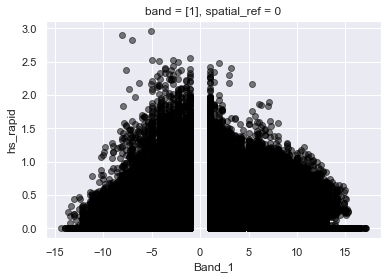

In [76]:
ds.plot.scatter(x='dce_rapid', y='hs_rapid', alpha=0.5, color='black')

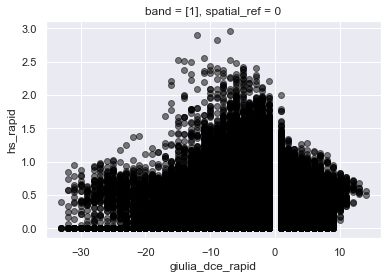

In [77]:
ds.plot.scatter(x='giulia_dce_rapid', y='hs_rapid', alpha=0.5, color='black')

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\4006841918.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


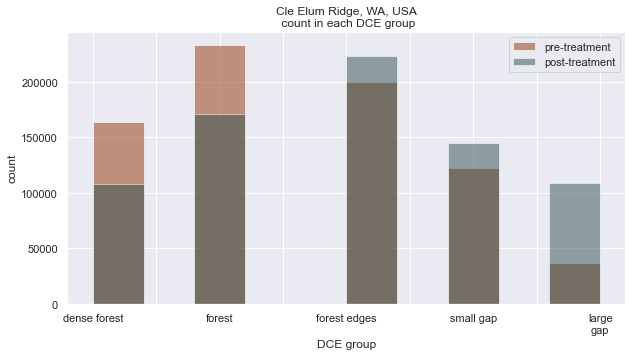

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ds['dce_ncalm_reclass'].plot.hist(alpha=0.6, color=colorpre, label='pre-treatment')
ds['dce_rapid_reclass'].plot.hist(alpha=0.5, color=colorpos, label='post-treatment')

# relable x tick labels
#plt.xtick(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', '']) # 100 is forest, 300 is edge, 500 is gap

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[9] = 'large\ngap'
labels[8] = ''
labels[7] = 'small gap'
labels[6] = ''
labels[5] = 'forest edges'
labels[4] = ''
labels[3] = 'forest'
labels[2] = ''
labels[1] = 'dense forest'
ax.set_xticklabels(labels)

plt.title('Cle Elum Ridge, WA, USA\n count in each DCE group')
plt.ylabel('count')
plt.xlabel('DCE group')
plt.legend()
plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\1323954561.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


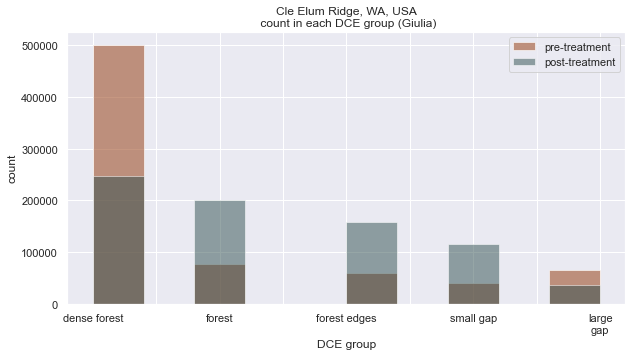

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ds['giulia_dce_ncalm_reclass'].plot.hist(alpha=0.6, color=colorpre, label='pre-treatment')
ds['giulia_dce_rapid_reclass'].plot.hist(alpha=0.5, color=colorpos, label='post-treatment')

# relable x tick labels
#plt.xtick(['', 'Open', 'Gap', 'Edge', 'Forest', 'Dense', '']) # 100 is forest, 300 is edge, 500 is gap

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[9] = 'large\ngap'
labels[8] = ''
labels[7] = 'small gap'
labels[6] = ''
labels[5] = 'forest edges'
labels[4] = ''
labels[3] = 'forest'
labels[2] = ''
labels[1] = 'dense forest'
ax.set_xticklabels(labels)

plt.title('Cle Elum Ridge, WA, USA\n count in each DCE group (Giulia)')
plt.ylabel('count')
plt.xlabel('DCE group')
plt.legend()
plt.show()

Now, do this but for each of the baf groups to see the most changes.

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\1728223625.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels)


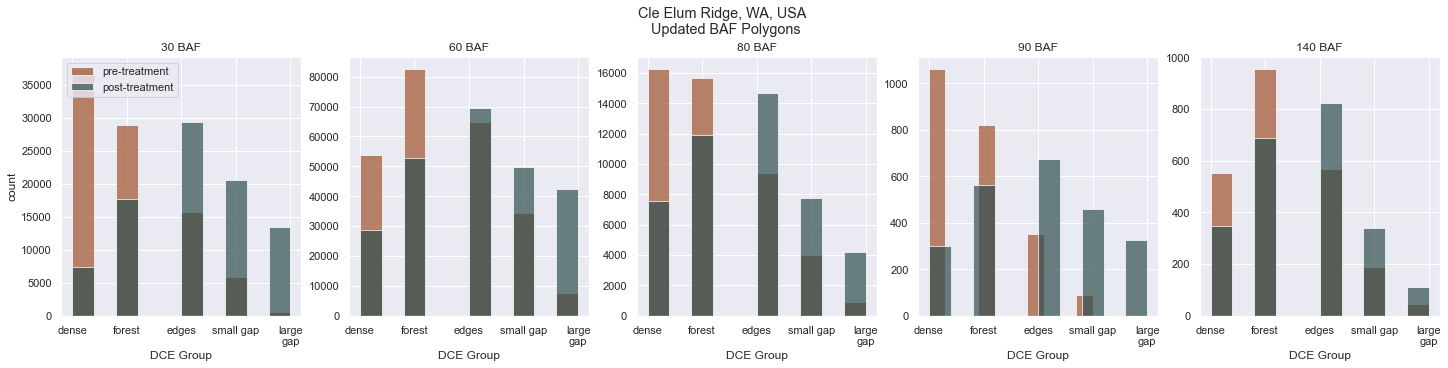

In [64]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# baf 30
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

# baf 80
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

# baf 90
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

# baf 140
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpos, alpha=alpha)



# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('DCE Group')
axes[1].set_xlabel('DCE Group')
axes[2].set_xlabel('DCE Group')
axes[3].set_xlabel('DCE Group')
axes[4].set_xlabel('DCE Group')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'small gap'
labels[5] = 'large\ngap'
axes[0].set_xticklabels(labels)


plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\2496094041.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels)


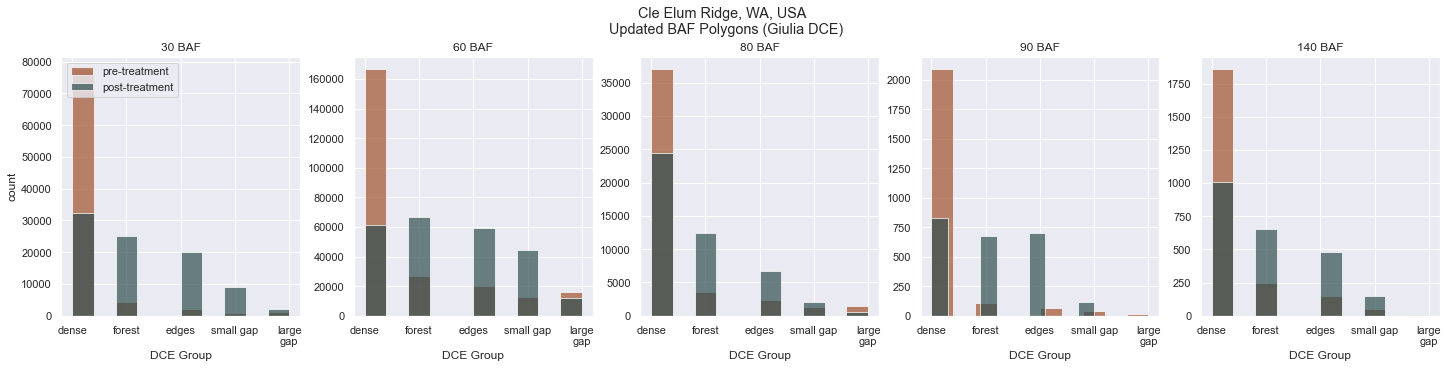

In [33]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# baf 30
ds['giulia_dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['giulia_dce_rapid_reclass'].where(ds['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds['giulia_dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_reclass'].where(ds['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

# baf 80
ds['giulia_dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_reclass'].where(ds['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

# baf 90
ds['giulia_dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_reclass'].where(ds['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

# baf 140
ds['giulia_dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_reclass'].where(ds['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpos, alpha=alpha)



# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('DCE Group')
axes[1].set_xlabel('DCE Group')
axes[2].set_xlabel('DCE Group')
axes[3].set_xlabel('DCE Group')
axes[4].set_xlabel('DCE Group')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'small gap'
labels[5] = 'large\ngap'
axes[0].set_xticklabels(labels)


plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons (Giulia DCE)')
axes[0].legend(loc='upper left')

plt.show()

Go by aspect. Do one row with positive DAH and one row with negative 

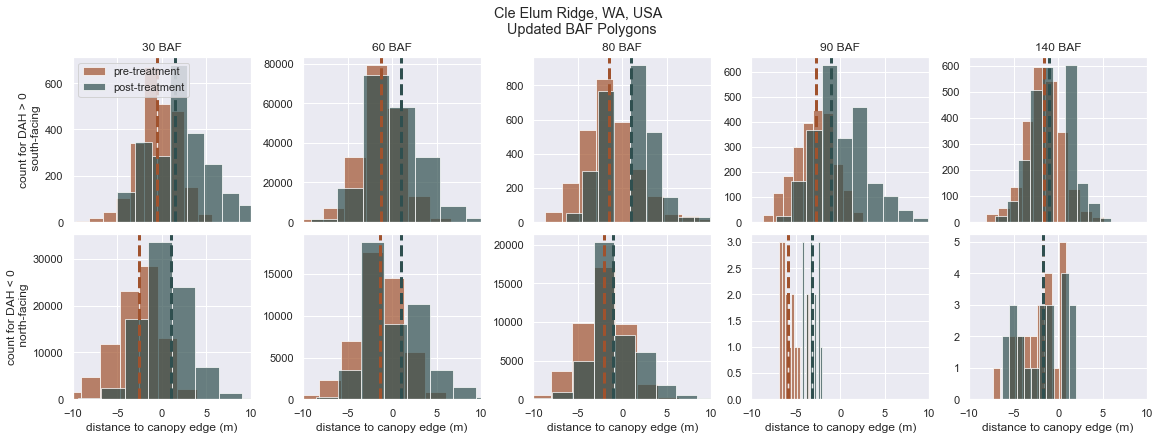

In [34]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# for DAH > 0
ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0,0].axvline(ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,0].axvline(ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,1].axvline(ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,1].axvline(ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,2].axvline(ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,2].axvline(ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,3].axvline(ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,3].axvline(ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,4].axvline(ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,4].axvline(ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

# for DAH < 0 
ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[1,0].axvline(ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,0].axvline(ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,1].axvline(ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,1].axvline(ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,2].axvline(ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,2].axvline(ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,3].axvline(ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,3].axvline(ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,4].axvline(ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,4].axvline(ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('distance to canopy edge (m)')
axes[1,1].set_xlabel('distance to canopy edge (m)')
axes[1,2].set_xlabel('distance to canopy edge (m)')
axes[1,3].set_xlabel('distance to canopy edge (m)')
axes[1,4].set_xlabel('distance to canopy edge (m)')
axes[0,0].set_ylabel('count for DAH > 0\n south-facing')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for DAH < 0\n north-facing')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x limits
axes[0,0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0,0].legend(loc='upper left')

plt.show()

So, what we were trying to do was not working, so let's just make two versions of the dataset for DAH pos and neg, then replot
* I did not need to do that, it was an axes error, but anyway.. 

In [43]:
ds_dahpos = ds.where(ds['dah_binary'] == 1)
ds_dahneg = ds.where(ds['dah_binary'] == -1)

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\3039772718.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(labels)


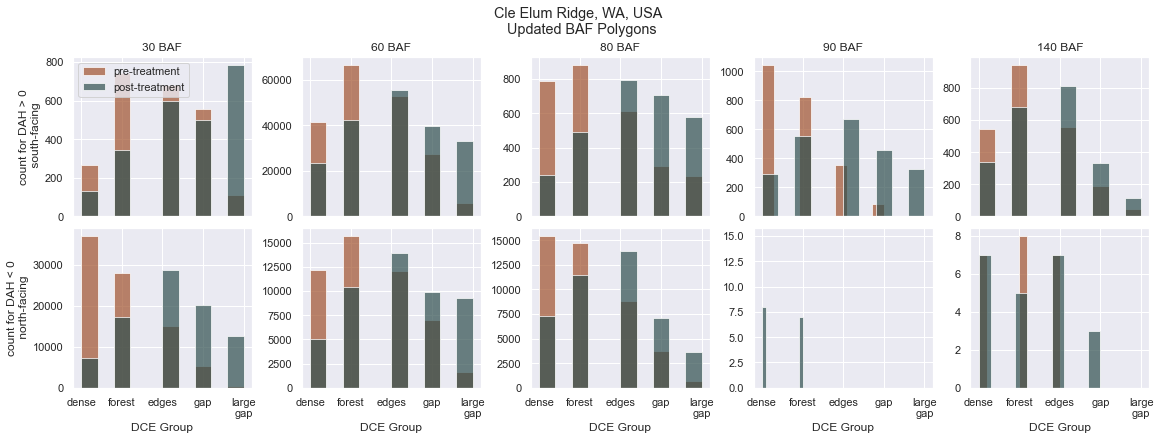

In [62]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots  for DAH > 0, pos
# baf 30
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)


# plots for DAH < 0, neg
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)


# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('DCE Group')
axes[1,1].set_xlabel('DCE Group')
axes[1,2].set_xlabel('DCE Group')
axes[1,3].set_xlabel('DCE Group')
axes[1,4].set_xlabel('DCE Group')
axes[0,0].set_ylabel('count for DAH > 0\n south-facing')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for DAH < 0\n north-facing')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'gap'
labels[5] = 'large\ngap'
axes[0,0].set_xticklabels(labels)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0,0].legend(loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\2237444879.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(labels)


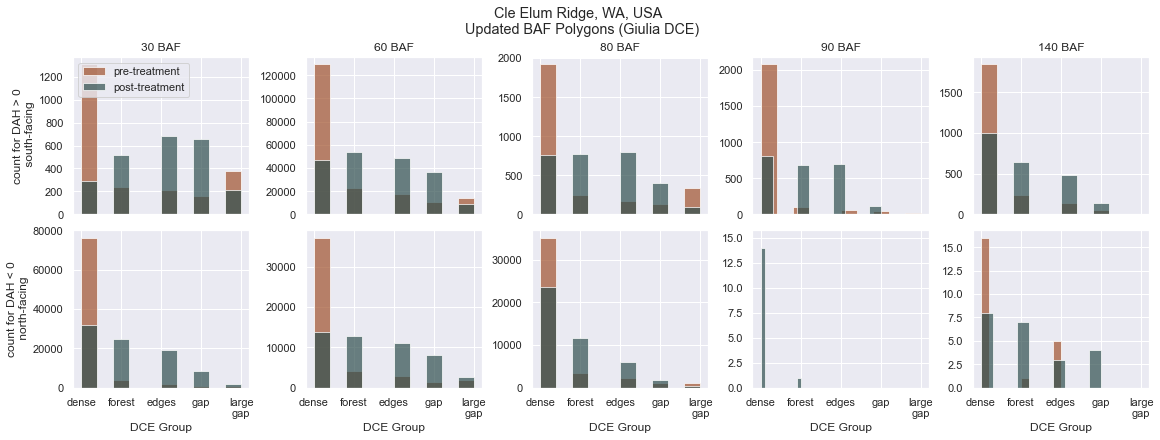

In [60]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots  for DAH > 0, pos
# baf 30
ds_dahpos['giulia_dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahpos['giulia_dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahpos['giulia_dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds_dahpos['giulia_dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahpos['giulia_dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds_dahpos['giulia_dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahpos['giulia_dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds_dahpos['giulia_dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahpos['giulia_dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds_dahpos['giulia_dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)


# plots for DAH < 0, neg
ds_dahneg['giulia_dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahneg['giulia_dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahneg['giulia_dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds_dahneg['giulia_dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahneg['giulia_dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds_dahneg['giulia_dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahneg['giulia_dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds_dahneg['giulia_dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahneg['giulia_dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds_dahneg['giulia_dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)


# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('DCE Group')
axes[1,1].set_xlabel('DCE Group')
axes[1,2].set_xlabel('DCE Group')
axes[1,3].set_xlabel('DCE Group')
axes[1,4].set_xlabel('DCE Group')
axes[0,0].set_ylabel('count for DAH > 0\n south-facing')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for DAH < 0\n north-facing')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'gap'
labels[5] = 'large\ngap'
axes[0,0].set_xticklabels(labels)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons (Giulia DCE)')
axes[0,0].legend(loc='upper left')

plt.show()

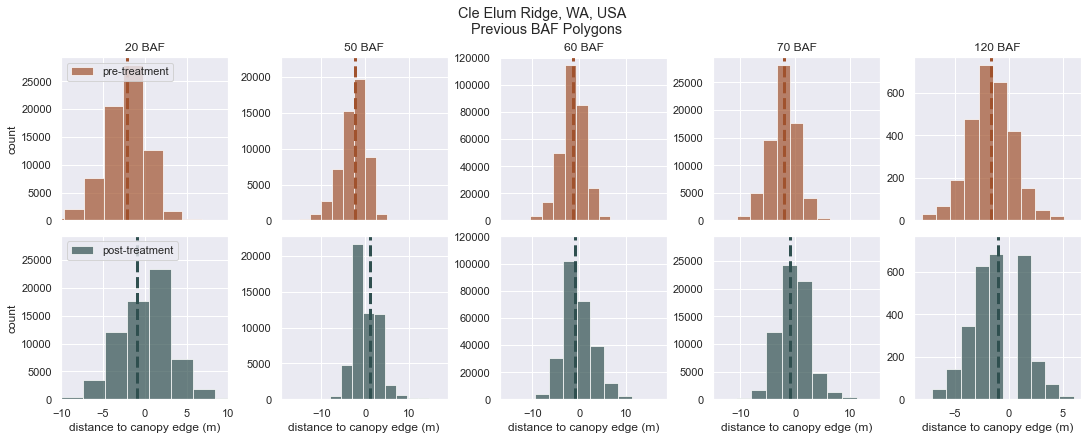

In [18]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 5, sharex='col', sharey='col', figsize=(15,6), constrained_layout = True)

# do the same for ncalm 
ds['dce_ncalm_baf_old_20'].plot.hist(ax=axes[0,0], bins=10, color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_ncalm_baf_old_50'].plot.hist(ax=axes[0,1], bins=10, color=colorpre, alpha=alpha)
ds['dce_ncalm_baf_old_60'].plot.hist(ax=axes[0,2], bins=10, color=colorpre, alpha=alpha)
ds['dce_ncalm_baf_old_70'].plot.hist(ax=axes[0,3], bins=10, color=colorpre, alpha=alpha)
ds['dce_ncalm_baf_old_120'].plot.hist(ax=axes[0,4], bins=10, color=colorpre, alpha=alpha)

# plot the median lines
axes[0,0].axvline(ds['dce_ncalm_baf_old_20'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,1].axvline(ds['dce_ncalm_baf_old_50'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,2].axvline(ds['dce_ncalm_baf_old_60'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,3].axvline(ds['dce_ncalm_baf_old_70'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,4].axvline(ds['dce_ncalm_baf_old_120'].median(), color=colorpre, linestyle='dashed', linewidth=3)


ds['dce_rapid_baf_old_20'].plot.hist(ax=axes[1,0], bins=10, color=colorpos, label='post-treatment', alpha=alpha)
ds['dce_rapid_baf_old_50'].plot.hist(ax=axes[1,1], bins=10, color=colorpos, alpha=alpha)
ds['dce_rapid_baf_old_60'].plot.hist(ax=axes[1,2], bins=10, color=colorpos, alpha=alpha)
ds['dce_rapid_baf_old_70'].plot.hist(ax=axes[1,3], bins=10, color=colorpos, alpha=alpha)
ds['dce_rapid_baf_old_120'].plot.hist(ax=axes[1,4], bins=10, color=colorpos, alpha=alpha)

# plot the median lines
axes[1,0].axvline(ds['dce_rapid_baf_old_20'].median(), color=colorpos, linestyle='dashed', linewidth=3)
axes[1,1].axvline(ds['dce_rapid_baf_old_50'].median(), color=colorpos, linestyle='dashed', linewidth=3)
axes[1,2].axvline(ds['dce_rapid_baf_old_60'].median(), color=colorpos, linestyle='dashed', linewidth=3)
axes[1,3].axvline(ds['dce_rapid_baf_old_70'].median(), color=colorpos, linestyle='dashed', linewidth=3)
axes[1,4].axvline(ds['dce_rapid_baf_old_120'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0,0].set_title('20 BAF')
axes[0,1].set_title('50 BAF')
axes[0,2].set_title('60 BAF')
axes[0,3].set_title('70 BAF')
axes[0,4].set_title('120 BAF')

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[0,3].set_xlabel('')
axes[0,4].set_xlabel('')
axes[0,0].set_ylabel('count')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_title('')
axes[1,1].set_title('')
axes[1,2].set_title('')
axes[1,3].set_title('')
axes[1,4].set_title('')

axes[1,0].set_xlabel('distance to canopy edge (m)')
axes[1,1].set_xlabel('distance to canopy edge (m)')
axes[1,2].set_xlabel('distance to canopy edge (m)')
axes[1,3].set_xlabel('distance to canopy edge (m)')
axes[1,4].set_xlabel('distance to canopy edge (m)')
axes[1,0].set_ylabel('count')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x limits
axes[0,0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Previous BAF Polygons')
axes[0,0].legend(loc='upper left')
axes[1,0].legend(loc='upper left')

plt.show()

In [16]:
# Create a box plot of distance to canopy edge within each BAF polygon
plt.figure(figsize=(12,6))

sns.boxplot(x=ds['baf_new'].values.flatten(), y=ds['dce_rapid'].values.flatten()
            , notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel('dce (m)')
plt.ylabel('snow depth (m)')
plt.title('Cle Elum Ridge (CER) after treatments')
# plt.xticks([0,1,2,3,4], ['30','60','80','90','140'])
plt.xticks([0,1,2,3,4,5,6,7,8], ['32','38','60','69', '80', '82', '90', '92', '140'])
plt.legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()